---

## 목차
1. **데이터 읽기** <br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제** <br>
    2.1. 결측치 확인<br>
    2.2. 중복값 확인<br>
    2.3. 기초적인 데이터 변형<br>
<br>
3. **데이터 시각화** <br>
    3.1. 제조사별 리콜 현황 출력<br>
    3.2. 모델별 리콜 현황 출력<br>
    3.3. 월별 리콜 현황 출력<br>
    3.4. 생산연도별 리콜 현황 출력<br>
    3.5. 4분기 제조사별 리콜 현황 출력<br>
    3.6. 하반기 생산연도별 리콜 현황 출력<br>
    3.7. 워드 클라우드를 이용한 리콜 사유 시각화<br

---

## 1. 데이터 읽기

필요한 패키지 설치 및 `import`  =>  `pandas`를 이용하여 데이터를 읽는다.

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)
# missingno: 결측데이터를 파악하는데 도움을 주는 패키지.

# missingno라는 라이브러리가 설치되어 있을 경우 import
try: 
    import missingno as msno
# missingno라는 라이브러리가 설치되어 있지 않을 경우 설치 후 import
except: 
    !pip install missingno
    import missingno as msno

0.9.0


### 1.1. 데이터 불러오기

In [9]:
# pd.read_csv를 통하여 csv=파일을 읽는다.
# dataframe 형태로 읽어온다.
df = pd.read_csv("./data/한국교통안전공단_자동차결함 리콜현황.csv")

In [10]:
# 상위 5개 데이터 출력. => head()
df.head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [5]:
# 하위 5개 데이터를 출력합니다. => tail()
df.tail()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274,한국닛산(주),INFINITI Q70 5.6,2014-04-08,2014-04-08,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


In [6]:
display(df.head(2),df.tail(2))

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...


,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274,한국닛산(주),INFINITI Q70 5.6,2014-04-08,2014-04-08,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


In [7]:
# dataframe 정보를 요약하여 출력. => info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1275 non-null   object
 1   차명      1275 non-null   object
 2   생산기간    1275 non-null   object
 3   생산기간.1  1275 non-null   object
 4   리콜개시일   1275 non-null   object
 5   리콜사유    1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


---

## 2. 데이터 정제

결측값(missing data)과 중복값(duplicates) 처리 + 기초 데이터 변형

### 2.1. 결측치 확인

`missingno.matrix()` 함수를 이용하여 결측치를 시각화할 수 있다. => 결측치를 매트릭스 형태로 시각화

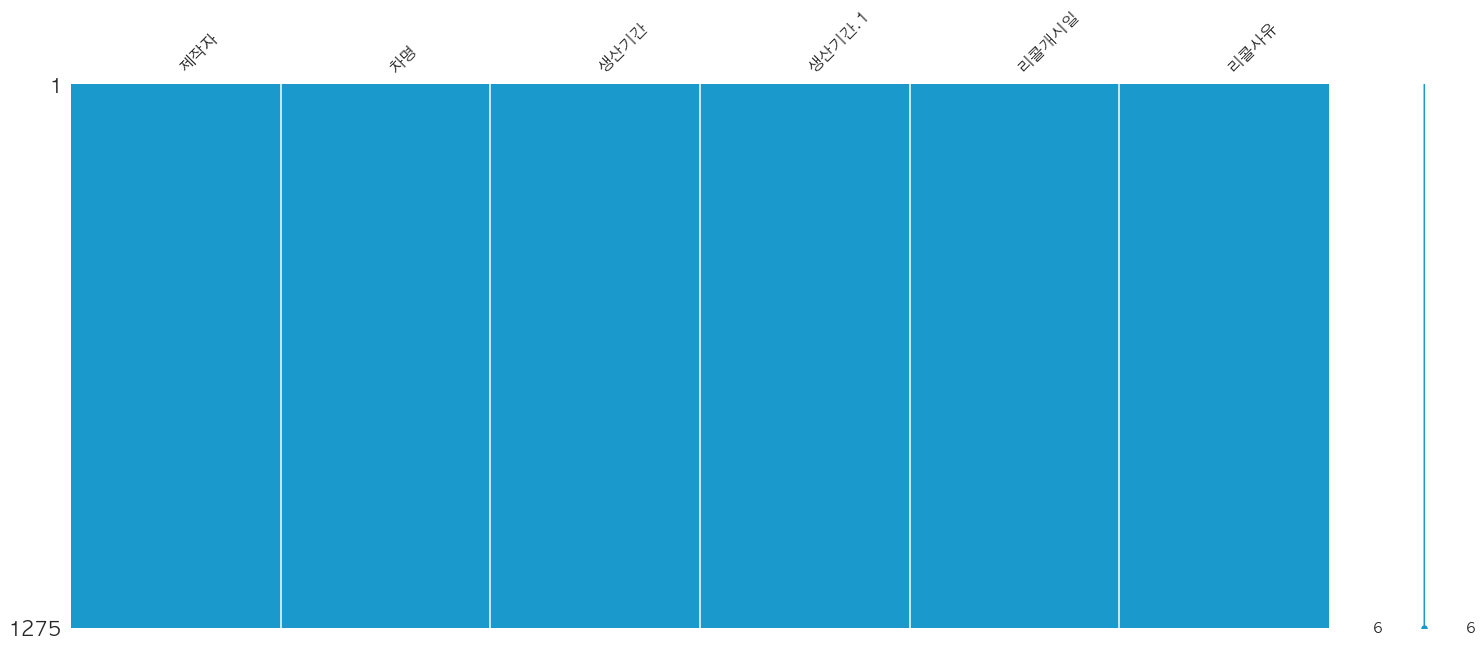

In [15]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False})
msno.matrix(df, color=(0.1, 0.6, 0.8))
plt.show()

In [16]:
# isna() 함수를 이용하여 결측치(비어있는 값)를 확인. => (True(결측치):1, False:0)
df.isna().sum() 

제작자       0
차명        0
생산기간      0
생산기간.1    0
리콜개시일     0
리콜사유      0
dtype: int64

### 2.2. 중복값 확인(duplicated)

In [16]:
# duplicated() 함수를 이용하여 중복값을 확인.
# (keep=False) => 중복 된 값을 모두 저장 
df[df.duplicated(keep=False)]

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...


`drop_duplicates()` 함수를 이용하여 중복값을 제거할 수 있다.

In [17]:
print("Before:", len(df))
# drop_duplicates() => 중복 된 값 제거 
df = df.drop_duplicates()
print("After:", len(df))

Before: 1275
After: 1274


### 2.3. 기초적인 데이터 변형

`생산기간`, `생산기간.1`, `리콜개시일` 열은 모두 문자열로 인식되고 있다. <br>
분석을 위해 연, 월, 일을 각각 정수형으로 저장하고, 열 이름을 영어로 변경.

In [18]:
df.head(2)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...


In [20]:
# 문자열을 정제하는 함수를 생성(년,월,일을 정수형으로 저장)
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

In [21]:
# 위에서 만든 함수를 DataFrame에 적용 => apply를 이용하여 적용

df['start_year'] = df['생산기간'].apply(parse_year)
df['start_month'] = df['생산기간'].apply(parse_month)
df['start_day'] = df['생산기간'].apply(parse_day)

df['end_year'] = df['생산기간.1'].apply(parse_year)
df['end_month'] = df['생산기간.1'].apply(parse_month)
df['end_day'] = df['생산기간.1'].apply(parse_day)

df['recall_year'] = df['리콜개시일'].apply(parse_year)
df['recall_month'] = df['리콜개시일'].apply(parse_month)
df['recall_day'] = df['리콜개시일'].apply(parse_day)

df.head(3)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


In [22]:
# 불필요한 열 삭제 +  열 이름을 영어로 설정.
df = df.drop(columns=['생산기간', '생산기간.1', '리콜개시일']).rename(columns={'제작자': "manufacturer", "차명": "model", "리콜사유": "cause"})
df.head(3)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


추가적으로 리콜연도(recall_year)가 2020년의 데이터만을 대상으로 설정.

In [23]:
# recall_year의 최소값과 최대값 출력
df.recall_year.min(), df.recall_year.max()

(2019, 2020)

In [24]:
# 2020년의 데이터만을 df에 저장하여 남김.
df = df[df['recall_year']==2020]
len(df)

1263

---

## 3. 데이터 시각화

각 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 한다.

### 3.1. 제조사별 리콜 현황 출력

In [25]:
df.head(2)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23


In [27]:
# 리콜을 많이 한 제조사 별로 출력 => sort_values(ascending=False)
df.groupby("manufacturer").count()["model"].sort_values(ascending=False)

manufacturer
비엠더블유코리아(주)           526
메르세데스벤츠코리아(주)         234
아우디폭스바겐코리아(주)         115
한불모터스(주)               71
한국토요타자동차(주)            54
(주)볼보자동차코리아            39
현대자동차(주)               28
기아자동차(주)               19
(주) 한국모터트레이딩           16
한국지엠주식회사               15
포드세일즈서비스코리아(유)         14
화창상사(주)                14
다임러트럭코리아(주)            13
(주) 바이크코리아             12
만트럭버스코리아(주)            11
혼다코리아(주)               10
(주)에프엠케이                9
에프씨에이코리아(주)             7
(주)재규어랜드로버코리아           7
한국닛산(주)                 7
대전기계공업(주)               6
르노삼성자동차(주)              6
포르쉐코리아 주식회사             5
유한회사 모토로싸               4
(주)스포츠모터사이클코리아          4
기흥인터내셔널 유한회사            4
허스크바나모터싸이클코리아 주식회사      3
쌍용자동차(주)                3
(주)에이비케이                2
(주) 다빈월드                1
지엠아시아퍼시픽지역본부 주식회사       1
아이씨피(주)                 1
(주)스즈키씨엠씨               1
스카니아코리아그룹(주)            1
Name: model, dtype: int64

In [28]:
# 표 형태로 깔끔하게 출력
tmp = pd.DataFrame(df.groupby("manufacturer").count()["model"].sort_values(ascending=False)).rename(columns={"model": "count"})
tmp

,count
manufacturer,
비엠더블유코리아(주),526
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
기아자동차(주),19
(주) 한국모터트레이딩,16


In [29]:
# tmp의 index가 회사명으로 변한 것을 알수 있다.
tmp.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '아우디폭스바겐코리아(주)', '한불모터스(주)',
       '한국토요타자동차(주)', '(주)볼보자동차코리아', '현대자동차(주)', '기아자동차(주)', '(주) 한국모터트레이딩',
       '한국지엠주식회사', '포드세일즈서비스코리아(유)', '화창상사(주)', '다임러트럭코리아(주)', '(주) 바이크코리아',
       '만트럭버스코리아(주)', '혼다코리아(주)', '(주)에프엠케이', '에프씨에이코리아(주)', '(주)재규어랜드로버코리아',
       '한국닛산(주)', '대전기계공업(주)', '르노삼성자동차(주)', '포르쉐코리아 주식회사', '유한회사 모토로싸',
       '(주)스포츠모터사이클코리아', '기흥인터내셔널 유한회사', '허스크바나모터싸이클코리아 주식회사', '쌍용자동차(주)',
       '(주)에이비케이', '(주) 다빈월드', '지엠아시아퍼시픽지역본부 주식회사', '아이씨피(주)', '(주)스즈키씨엠씨',
       '스카니아코리아그룹(주)'],
      dtype='object', name='manufacturer')

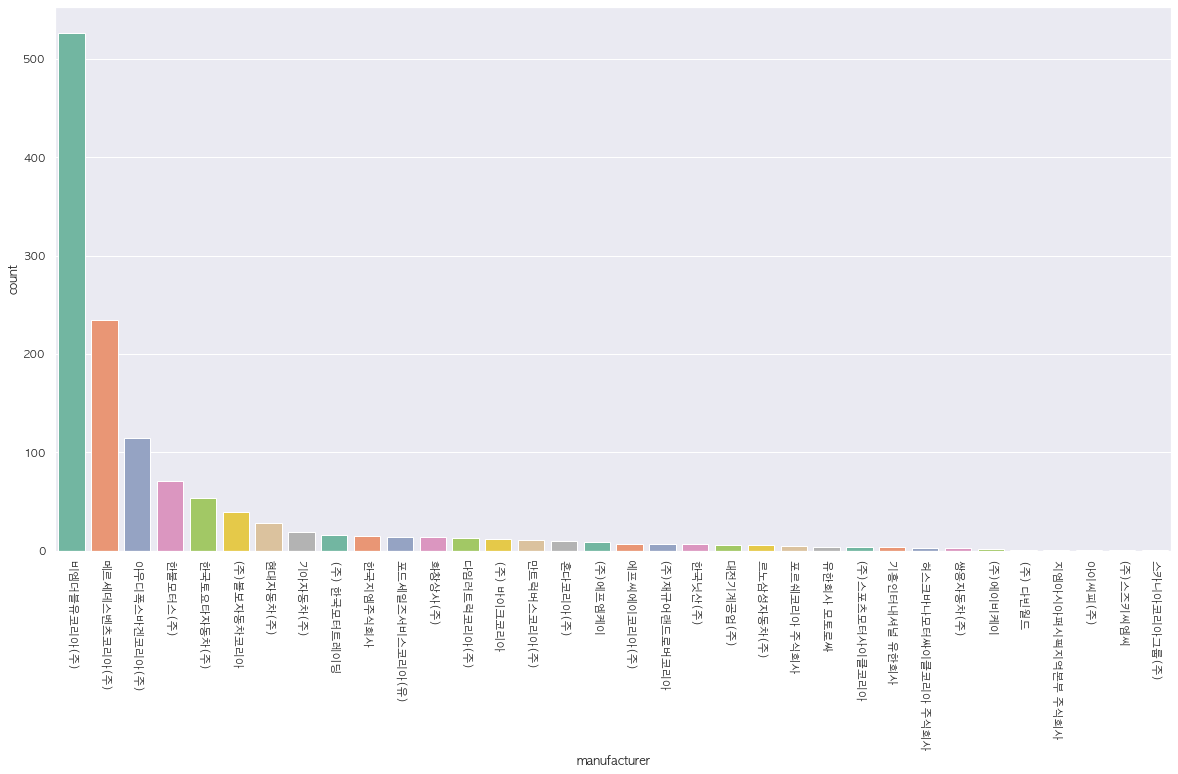

In [30]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정.
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df, palette="Set2", order=tmp.index)
# x축 이름 회전
plt.xticks(rotation=270)
plt.show()

### 3.2. 차량 모델별 리콜 현황 출력

In [31]:
pd.DataFrame(df.groupby("model").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"}).head(10)

,count
model,
BMW 320d,15
BMW 520d,15
BMW X3 xDrive20d,11
BMW 520d xDrive,10
BMW 320d Gran Turismo,9
BMW X6 xDrive30d,9
MINI Cooper D,8
BMW 320d xDrive Gran Turismo,8
BMW X5 xDrive30d,8


#### 차량 모델은 굉장히 많으므로, 상위 30개 모델만 뽑아 시각화 진행.

In [32]:
tmp = pd.DataFrame(df.groupby("model").count()["manufacturer"].sort_values(ascending=False))
tmp = tmp.rename(columns={"manufacturer": "count"}).iloc[:30]
tmp

,count
model,
BMW 320d,15
BMW 520d,15
BMW X3 xDrive20d,11
BMW 520d xDrive,10
BMW 320d Gran Turismo,9
BMW X6 xDrive30d,9
MINI Cooper D,8
BMW 320d xDrive Gran Turismo,8
BMW X5 xDrive30d,8


In [33]:
# tmp의 index가 모델명으로 인 것을 알수 있다.
tmp.index

Index(['BMW 320d', 'BMW 520d', 'BMW X3 xDrive20d', 'BMW 520d xDrive',
       'BMW 320d Gran Turismo', 'BMW X6 xDrive30d', 'MINI Cooper D',
       'BMW 320d xDrive Gran Turismo', 'BMW X5 xDrive30d', '3세대 뉴 스프린터',
       'BMW X6 M50d', 'MINI Cooper D Countryman', 'DS3 Crossback 1.5 BlueHDi',
       'MINI Cooper SD Countryman ALL4', 'BMW 420d Gran Coupe', 'BMW 118d',
       'BMW X4 xDrive20d', 'BMW 325Ci', 'S60',
       'BMW 320d EfficientDynamics Edition', 'BMW 120d', 'BMW 525d xDrive',
       'BMW 325i', 'MINI Cooper D Countryman ALL4', 'BMW 730d xDrive',
       'BMW 330Ci', 'MINI Cooper SD', 'BMW 420d Coupe',
       'BMW 420d xDrive Gran Coupe', 'AMG GLC 43 4MATIC'],
      dtype='object', name='model')

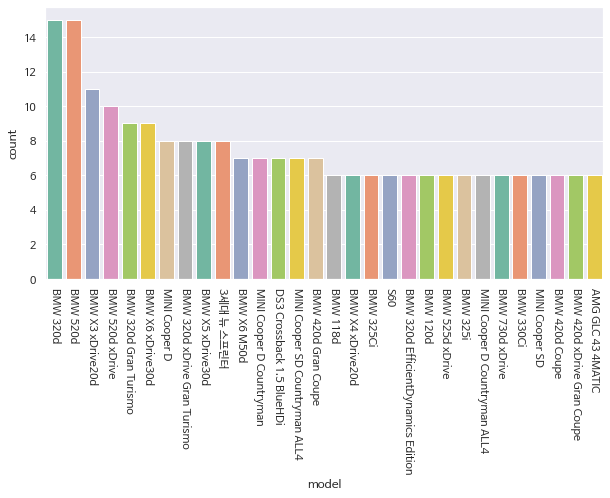

In [34]:
# 그래프의 사이즈를 조절.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력.
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="model", data=df[df.model.isin(tmp.index)], palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

### 3.3. 월별 리콜 현황 출력

In [34]:
tmp = pd.DataFrame(df.groupby("recall_month").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"})
tmp

,count
recall_month,
8,221
10,161
6,155
12,116
4,114
3,108
2,107
9,72
5,68


In [35]:
tmp.index

Int64Index([8, 10, 6, 12, 4, 3, 2, 9, 5, 7, 11, 1], dtype='int64', name='recall_month')

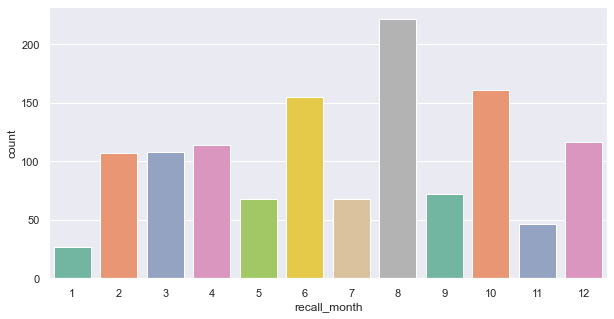

In [36]:
# 그래프의 사이즈를 조절.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력.
sns.set(style="darkgrid")
ax = sns.countplot(x="recall_month", data=df, palette="Set2")
plt.show()

### 3.4. 생산연도별 리콜 현황 출력

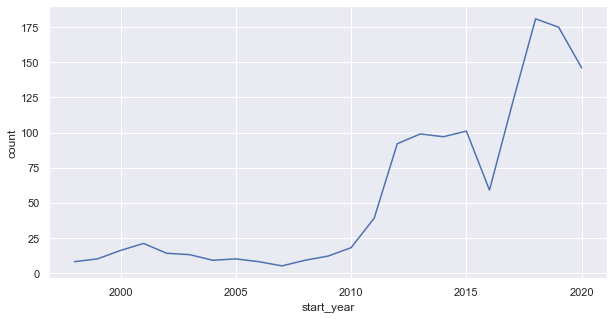

In [37]:
tmp = pd.DataFrame(df.groupby("start_year").count()["model"]).rename(columns={"model": "count"}).reset_index()

# 그래프의 사이즈를 조절.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력.
sns.set(style="darkgrid")
sns.lineplot(data=tmp, x="start_year", y="count")
plt.show()

#### 2020년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이.

In [38]:
tmp = pd.DataFrame(df.groupby("recall_month").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"})
tmp

,count
recall_month,
8,221
10,161
6,155
12,116
4,114
3,108
2,107
9,72
5,68


In [39]:
# 가장 큰 값은 인덱스 [0]에 작은 값은[-1]에 저장되어 있음
tmp.iloc[0]["count"]-tmp.iloc[-1]["count"]

194

### 3.5. 4분기 제조사별 리콜 현황 출력

가장 최근 데이터인 2020년 4분기(10, 11, 12월) 제조사별 리콜 현황을 시각화.

In [40]:
# 논리연산을 으로 조건을 사용하면 해당 조건에 맞는 데이터를 출력할 수 있다.
df[df.recall_month.isin([10,11,12])].head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
447,비엠더블유코리아(주),BMW 320d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,28,2015,6,30,2020,10,1
451,비엠더블유코리아(주),BMW 320d EfficientDynamics Edition,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2011,11,8,2015,6,29,2020,10,1
455,비엠더블유코리아(주),BMW 320d Gran Turismo,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,26,2015,5,21,2020,10,1


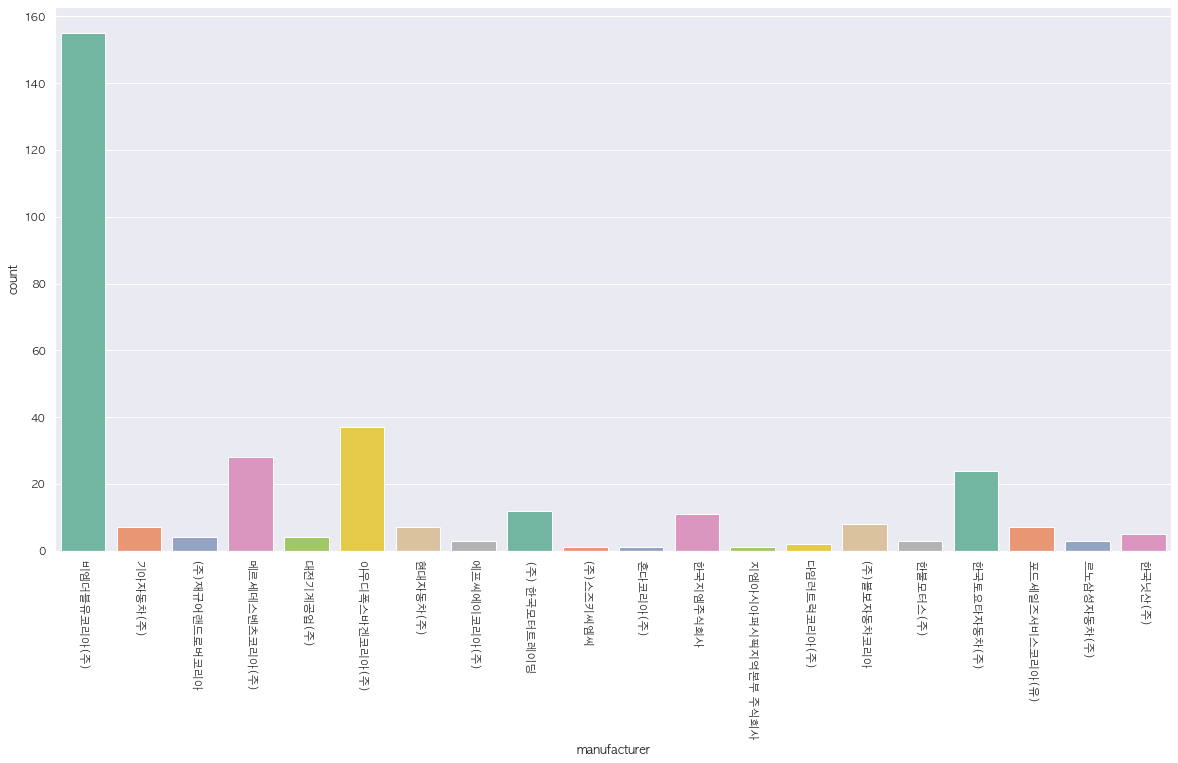

In [41]:
# 그래프를 출력합니다.
plt.figure(figsize=(20,10))
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df[df.recall_month.isin([10,11,12])], palette="Set2")
plt.xticks(rotation=270)
plt.show()

In [53]:
# 한국지엠주식회사의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명을 출력. 
df[df['manufacturer']=="한국지엠주식회사"].sort_values(by=["recall_year", "recall_month", "recall_day"], ascending=False).iloc[0]['model']



'트래버스'

### 3.6. 하반기 생산연도별 리콜 현황 출력

2020년 하반기(7~12월)에 개시된 리콜 건들을 생산 개시 연도(start_year)를 기준으로 시각화해봅시다.

In [42]:
# 해당 column을 지정하여 series 형태로 출력할 수 있습니다.
df[df.recall_month>=7].head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
437,비엠더블유코리아(주),BMW 118d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,2,2019,4,29,2020,8,1
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
441,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,13,2015,4,15,2020,8,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
445,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2014,10,16,2015,2,25,2020,8,1


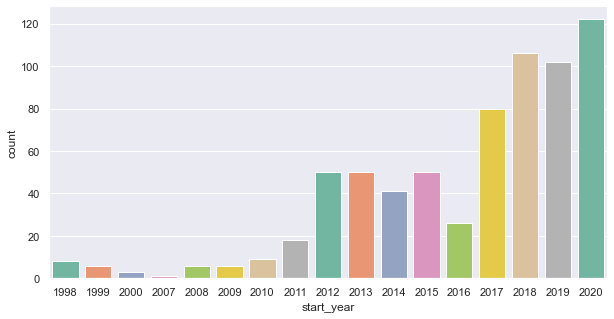

In [43]:
# 그래프를 출력.
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="start_year", data=df[df.recall_month>=7], palette="Set2")
plt.show()

### 3.7. 워드 클라우드를 이용한 리콜 사유 시각화

워드 클라우드를 이용하여 리콜 사유를 시각화. => 특정한 키워드가 얼마나 중요한지 시각화 해줌.

In [44]:
# 리콜 사유가 문장으로 되어있다.
df.cause

0       스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1       스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2       콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...
3       뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...
4       뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...
                              ...                        
1270                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
Name: cause, Length: 1263, dtype: object

In [45]:
# 워드 클라우드 생성을 도와주는 패키지를 import.
try:
    from wordcloud import WordCloud, STOPWORDS
except:
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS

     |████████████████████████████████| 220 kB 3.6 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158427 sha256=209cf23322960ef942b3264c15ec04cecf775fd5cf2ad49c5926037761d1ce4d
  Stored in directory: /Users/kimjinkyung/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


영어를 사용할 때는 상관 없지만, 우리말을 쓸 때에는 적합하지 않습니다. 여기서는 예시로 몇 개의 stopwords들을 수기로 저장해보겠습니다.

In [46]:
# 문법적인 성분들을 배제하기 위한 텍스트를 저장.
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "위해", "되지"])

In [47]:
# 리콜 사유에 해당하는 열의 값들을 중복 제거한 뒤 모두 이어붙임 => text라는 문자열로 저장.
text = ""

for c in df.cause.drop_duplicates():
    text += c

text[:100]

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전'

##워드 클라우드를 생성하고 시각화.

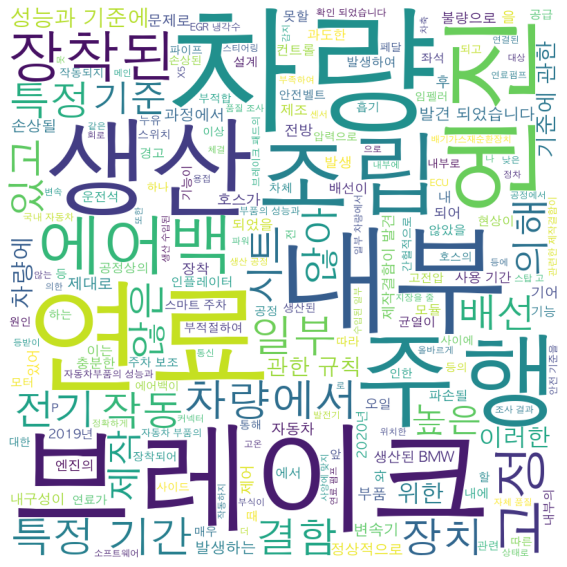

In [51]:
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='/Library/Fonts/AppleGothic.ttf',
                background_color='white', width=800, height=800)

wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

 ---